## Read into Python

Let's first read the required data from CSV file using Pandas library.

In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
import seaborn as sns               #For better Visualisation
from bs4 import BeautifulSoup       #For Text Parsing

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('gold_1.csv')
data = data[['Dates','News','PriceSentiment']]
print(data.shape)
data.head(7)


(2499, 3)


,Dates,News,PriceSentiment
0,28/1/16,"april gold down 20 cents to settle at $1,116.1...",negative
1,13/9/17,gold suffers third straight daily decline,negative
2,26/7/16,Gold futures edge up after two-session decline,positive
3,28/2/18,dent research : is gold's day in the sun comin...,none
4,6/9/17,"Gold snaps three-day rally as Trump, lawmakers...",negative
5,16/8/16,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",positive
6,24/9/13,"gold falls by rs 25 on sluggish demand, global...",negative


Now, show the data how looks like…

In [3]:
data.isnull().sum()

Dates             0
News              0
PriceSentiment    0
dtype: int64

In [4]:
data=data.dropna()
data.isnull().sum()

Dates             0
News              0
PriceSentiment    0
dtype: int64

['negative' 'positive' 'none' 'neutral']


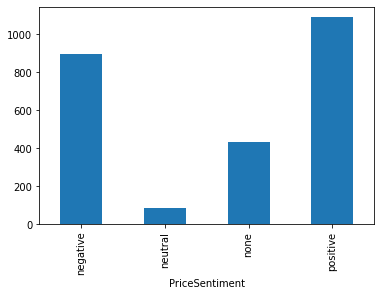

In [5]:
Sentiment = data['PriceSentiment'].unique()
print(Sentiment)

data.groupby(data['PriceSentiment']).News.count().plot.bar(ylim=0)
plt.show()


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatbest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

data['processedtext'] = data['News'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


In [8]:
print(data.shape)
data.head(10)

(2499, 4)


,Dates,News,PriceSentiment,processedtext
0,28/1/16,"april gold down 20 cents to settle at $1,116.1...",negative,april gold cent settl oz
1,13/9/17,gold suffers third straight daily decline,negative,gold suffer third straight daili declin
2,26/7/16,Gold futures edge up after two-session decline,positive,gold futur edg two session declin
3,28/2/18,dent research : is gold's day in the sun comin...,none,dent research gold day sun come soon
4,6/9/17,"Gold snaps three-day rally as Trump, lawmakers...",negative,gold snap three day ralli trump lawmak reach d...
5,16/8/16,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",positive,dec gold climb settl oz
6,24/9/13,"gold falls by rs 25 on sluggish demand, global...",negative,gold fall rs sluggish demand global cue
7,23/9/16,"Gold futures fall for the session, but gain fo...",positive,gold futur fall session gain week
8,21/10/12,"Gold struggles; silver slides, base metals falter",neutral,gold struggl silver slide base metal falter
9,16/3/18,"april gold holds slight gain, up $2.50, or 0.2...",positive,april gold hold slight gain oz


## Pre-process Data

We need to remove package name as it's not relevant. Then convert text to lowercase for CSV data. So, this is data pre-process stage.

In [9]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    #data = data.drop('News', axis=1)
    
    # Convert text to lowercase
    data['processedtext'] = data['processedtext'].str.strip().str.lower()
    return data

In [10]:
data = preprocess_data(data)

## Splitting Data

First, separate the columns into dependent and independent variables (or features and label). Then you split those variables into train and test set.

In [11]:
df = data
# Split into training and testing data
x = data['processedtext']
y = data['PriceSentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)


Vectorize text reviews to numbers.

In [12]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

## Model Generation

After splitting and vectorize text reviews to number, we will generate a random forest model on the training set and perform prediction on test set features.

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

## Evaluating Model

After model generation, check the accuracy using actual and predicted values.

In [14]:
model.score(x_test, y_test)*100


74.88

Then check prediction…

In [21]:
from itertools import count
import pandas as pd
df = pd.read_csv('gold-dataset-sinha-khandait.csv', sep=',', header=None)
start = 2500
end = 3500
df = df[start - 1:end - 1]
correct = 0
for i in range(len(df)):
    print(df.values[i][2])
    print(model.predict(vec.transform([df.values[i][2]])),df.values[i][9] == model.predict(vec.transform([df.values[i][2]])))
    
    if df.values[i][9] == model.predict(vec.transform([df.values[i][2]])):
        correct += 1
        
print(correct / len(df) * 100 )        

Gold prices ease in Asia, focus on U.S. Fed announcement
['positive'] [False]
gold slips but italy vote, trade war fears provide support
['positive'] [False]
june gold down 0.9%, or $6, at $677.50/oz in ny
['negative'] [ True]
gold futures end at one-week high
['positive'] [ True]
gold futures top $400
['positive'] [ True]
Commodity markets at crossroads; demand for gold wanes
['positive'] [False]
Gold edges up for a third straight session
['positive'] [ True]
Gold futures mark highest settlement since Sept. 30
['positive'] [ True]
june gold rises $3.20 to $602.60/oz after $604 high
['positive'] [ True]
Gold futures down at Rs 27,917 per 10 gm
['positive'] [False]
gold futures down 6.20 at $655.80 an ounce
['positive'] [False]
Gold maintains rising trend in futures trade on duty hike
['negative'] [False]
silver : gold/silver price ratio: an epic opportunity in silver
['negative'] [False]
june gold down $1.20 at $936.30 an ounce on nymex
['negative'] [ True]
Gold futures hold steady as 

In [16]:
#model.predict(vec.transform(['december gold down $1 at $749 an ounce on nymex']))

array(['negative'], dtype='<U8')

In [17]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']